## Importing Python Libraries


In [4]:
import glob
import random
import seaborn as sns
import calmap
import holoviews as hv
import plotly.express as px
import datashader as ds
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# get data file names

path =r'D:\Techstack\Covid Data\Project On Covid\csse_covid_19_daily_reports'

filenames = glob.glob(path + "/*.csv")

dfs = []

for filename in filenames:

    dfs.append(pd.read_csv(filename))

# Concatenate all data into one DataFrame

Df_covid = pd.concat(dfs, ignore_index=True)

ModuleNotFoundError: No module named 'calmap'

In [ ]:
Df_covid.head()

## Data Preprocessing 

In [8]:
Df_covid = Df_covid.rename(columns={"Last_Update":"Date"})

In [9]:
Df_covid["Date"] = pd.to_datetime(Df_covid["Date"]).dt.date

In [10]:
Df_covid["Date"]=pd.to_datetime(Df_covid["Date"],infer_datetime_format=True)

In [11]:
Df_covid.head()

,FIPS,Admin2,Province_State,Country_Region,Date,Lat,Long_,Confirmed,Deaths,Recovered,...,Combined_Key,Incident_Rate,Case_Fatality_Ratio,Province/State,Country/Region,Last Update,Latitude,Longitude,Incidence_Rate,Case-Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-01-02,33.93911,67.709953,51526.0,2191.0,41727.0,...,Afghanistan,0.000000,4.252222,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,Albania,2021-01-02,41.15330,20.168300,58316.0,1181.0,33634.0,...,Albania,2026.409062,2.025173,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,Algeria,2021-01-02,28.03390,1.659600,99897.0,2762.0,67395.0,...,Algeria,227.809861,2.764848,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,Andorra,2021-01-02,42.50630,1.521800,8117.0,84.0,7463.0,...,Andorra,10505.403482,1.034865,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,Angola,2021-01-02,-11.20270,17.873900,17568.0,405.0,11146.0,...,Angola,53.452981,2.305328,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## NOW PERFORMING EXPLORATORY DATA ANALYSIS (EDA)

In [12]:
Df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182267 entries, 0 to 1182266
Data columns (total 21 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   FIPS                 983865 non-null   float64       
 1   Admin2               985618 non-null   object        
 2   Province_State       1120994 non-null  object        
 3   Country_Region       1174650 non-null  object        
 4   Date                 1174650 non-null  datetime64[ns]
 5   Lat                  1151132 non-null  float64       
 6   Long_                1151132 non-null  float64       
 7   Confirmed            1182248 non-null  float64       
 8   Deaths               1181835 non-null  float64       
 9   Recovered            1181881 non-null  float64       
 10  Active               1174118 non-null  float64       
 11  Combined_Key         1174650 non-null  object        
 12  Incident_Rate        315051 non-null   float64       
 1

In [13]:
Df_covid.isna().sum()

FIPS                    198402
Admin2                  196649
Province_State           61273
Country_Region            7617
Date                      7617
Lat                      31135
Long_                    31135
Confirmed                   19
Deaths                     432
Recovered                  386
Active                    8149
Combined_Key              7617
Incident_Rate           867216
Case_Fatality_Ratio     863641
Province/State         1177909
Country/Region         1174650
Last Update            1174650
Latitude               1177468
Longitude              1177468
Incidence_Rate          557829
Case-Fatality_Ratio     553246
dtype: int64

In [14]:
full_latest = Df_covid[Df_covid['Date'] == max(Df_covid['Date'])].reset_index()
world = full_latest.groupby("Country_Region")['Confirmed','Active','Recovered','Deaths'].sum().reset_index()
world.head()

<ipython-input-14-303db51cad88>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  world = full_latest.groupby("Country_Region")['Confirmed','Active','Recovered','Deaths'].sum().reset_index()


,Country_Region,Confirmed,Active,Recovered,Deaths
0,Afghanistan,54891.0,4911.0,47583.0,2397.0
1,Albania,75454.0,28198.0,45906.0,1350.0
2,Algeria,106610.0,30984.0,72745.0,2881.0
3,Andorra,9779.0,737.0,8942.0,100.0
4,Angola,19672.0,1516.0,17692.0,464.0


C:\Users\ANSH VOHRA\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


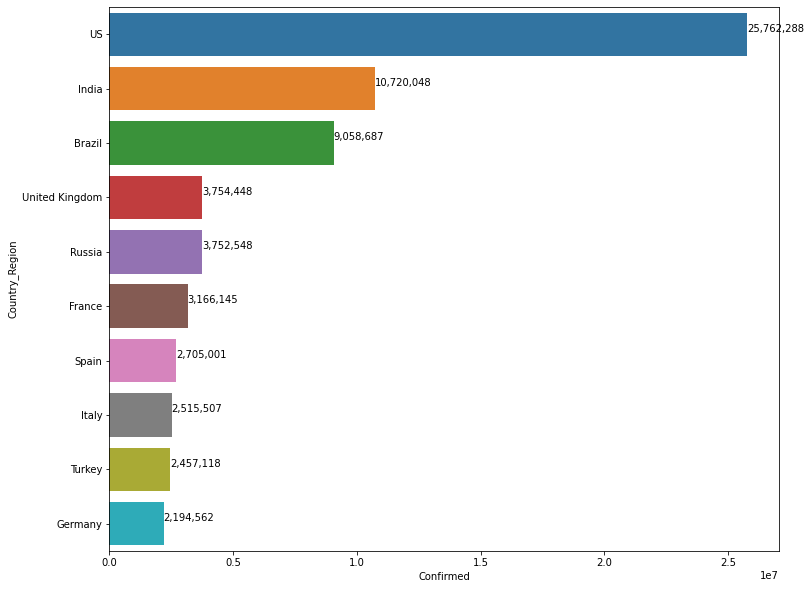

In [15]:
### Find top 20 countries with maximum number of confirmed cases
top_10 = world.sort_values(by=['Confirmed'], ascending=False).head(10)
### Generate a Barplot
plt.figure(figsize=(12,10))
plot = sns.barplot(top_10['Confirmed'], top_10['Country_Region'])
for i,(value,name) in enumerate(zip(top_10['Confirmed'],top_10['Country_Region'])):
  plot.text(value,i-0.05,f'{value:,.0f}',size=10)
plt.show()


D:\anaconda3\envs\python version38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\anaconda3\envs\python version38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


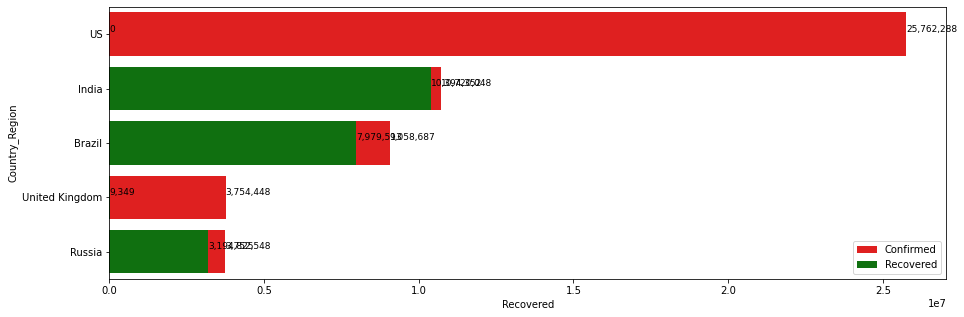

In [11]:
top_5 = world.sort_values(by=['Confirmed'], ascending=False).head()

### Generate a Barplot
plt.figure(figsize=(15,5))
confirmed = sns.barplot(top_5['Confirmed'], top_5['Country_Region'], color = 'red', label='Confirmed')
recovered = sns.barplot(top_5['Recovered'], top_5['Country_Region'], color = 'green', label='Recovered')

### Adding Texts for barplots
for i,(value,name) in enumerate(zip(top_5['Confirmed'],top_5['Country_Region'])):
  confirmed.text(value,i-0.05,f'{value:,.0f}',size=9)
for i,(value,name) in enumerate(zip(top_5['Recovered'],top_5['Country_Region'])):
  recovered.text(value,i-0.05,f'{value:,.0f}',size=9)
plt.legend(loc=4)
plt.show()

## Covid Confirmed Cases

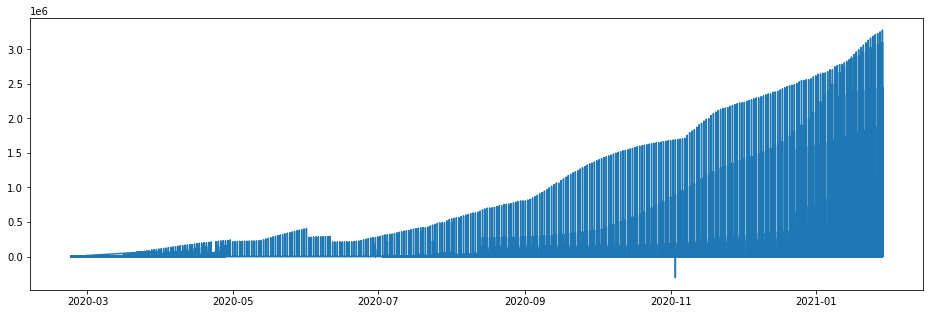

In [16]:
#Ploting 
import matplotlib.pyplot as plt
plt.figure(figsize=(16,5))
plt.plot(Df_covid.Date , Df_covid.Confirmed)

## Covid Deaths

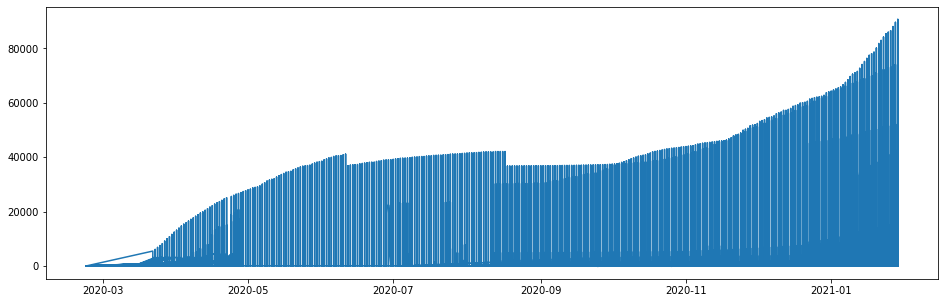

In [17]:
plt.figure(figsize=(16,5))
plt.plot(Df_covid.Date , Df_covid.Deaths)

## Covid Recovered Cases

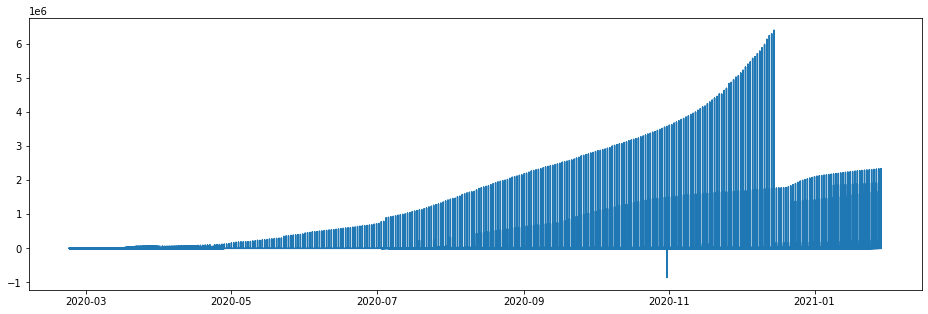

In [18]:
plt.figure(figsize=(16,5))
plt.plot(Df_covid.Date , Df_covid.Recovered)

In [19]:
#Filtering Now Analysis of Covid cases only in India
Df_India = Df_covid[Df_covid.Country_Region=='India']

In [20]:
Df_India.head()

,FIPS,Admin2,Province_State,Country_Region,Date,Lat,Long_,Confirmed,Deaths,Recovered,...,Combined_Key,Incident_Rate,Case_Fatality_Ratio,Province/State,Country/Region,Last Update,Latitude,Longitude,Incidence_Rate,Case-Fatality_Ratio
247,NaN,NaN,Andaman and Nicobar Islands,India,2021-01-02,11.225999,92.968178,4945.0,62.0,4826.0,...,"Andaman and Nicobar Islands, India",1185.748952,1.253792,NaN,NaN,NaN,NaN,NaN,NaN,NaN
248,NaN,NaN,Andhra Pradesh,India,2021-01-02,15.912900,79.740000,882286.0,7108.0,871916.0,...,"Andhra Pradesh, India",1636.791213,0.805634,NaN,NaN,NaN,NaN,NaN,NaN,NaN
249,NaN,NaN,Arunachal Pradesh,India,2021-01-02,27.768456,96.384277,16719.0,56.0,16564.0,...,"Arunachal Pradesh, India",1064.593896,0.334948,NaN,NaN,NaN,NaN,NaN,NaN,NaN
250,NaN,NaN,Assam,India,2021-01-02,26.357149,92.830441,216211.0,1045.0,211910.0,...,"Assam, India",607.214208,0.483324,NaN,NaN,NaN,NaN,NaN,NaN,NaN
251,NaN,NaN,Bihar,India,2021-01-02,25.679658,85.604840,251743.0,1397.0,245476.0,...,"Bihar, India",201.717267,0.554931,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# NOW VISUALISATION OF INDIA's COVID SITUATION

## Confirmed Cases in India

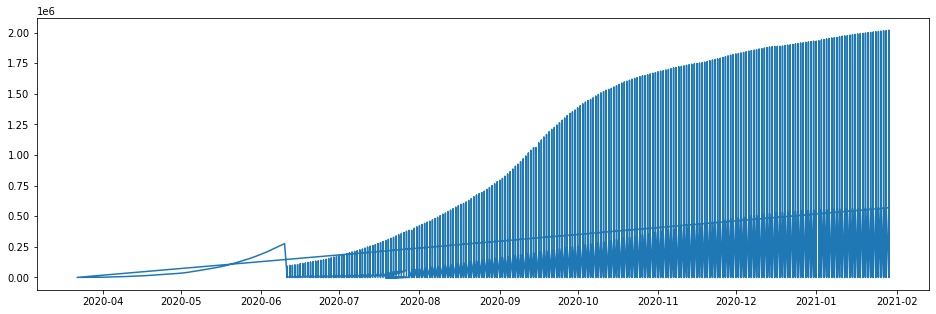

In [21]:
#Plotting Of Confirmed Cases in India
plt.figure(figsize=(16,5))
plt.plot(Df_India.Date , Df_India.Confirmed)

## Covid Deaths In India

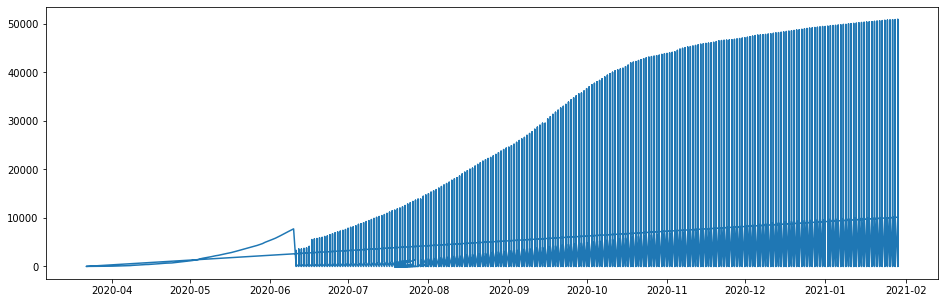

In [22]:
plt.figure(figsize=(16,5))
plt.plot(Df_India.Date , Df_India.Deaths)

## Recovery From Covid In India

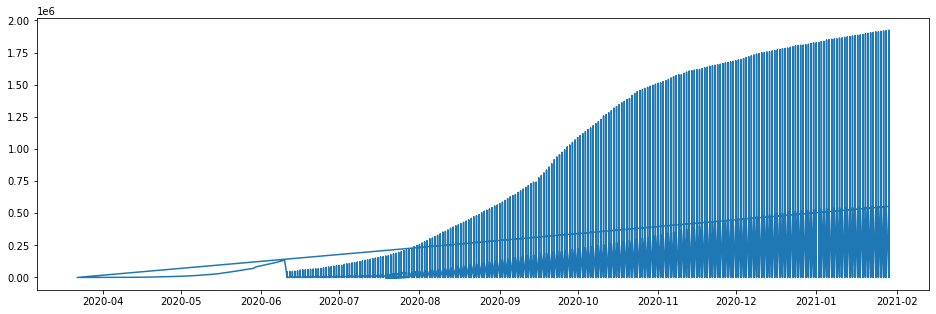

In [28]:
plt.figure(figsize=(16,5))
plt.plot(Df_India.Date , Df_India.Recovered)

In [29]:
import plotly.express as px
fig = px.choropleth(world, locations="Country_Region", 
                    locationmode='country names', color=np.log(world["Confirmed"]), 
                    hover_name="Country_Region", hover_data=['Confirmed'],
                    color_continuous_scale="peach", 
                    title='Countries with Confirmed Cases')
fig.update(layout_coloraxis_showscale=False)
fig.show()


In [39]:
# Deaths
fig = px.choropleth(world, 
                    locations="Country_Region", locationmode='country names',
                    color=np.log(world["Deaths"]), hover_name="Country_Region", 
                    color_continuous_scale="Peach", hover_data=['Deaths'],
                    title='Countries with Deaths Reported')
fig.update(layout_coloraxis_showscale=False)
fig.show()


C:\Users\ANSH VOHRA\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning:

divide by zero encountered in log



In [41]:
temp = Df_covid.groupby('Date')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
temp = temp[temp['Date']==max(temp['Date'])].reset_index(drop=True)
temp['Global Moratality'] = temp['Deaths']/temp['Confirmed']
temp['Deaths per 100 Confirmed Cases'] = temp['Global Moratality']*100
temp.style.background_gradient(cmap='Pastel1')

<ipython-input-41-23cda484d291>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Date,Confirmed,Deaths,Recovered,Active,Global Moratality,Deaths per 100 Confirmed Cases
0,2021-01-29 00:00:00,101452950.000000,2191069.000000,56043419.000000,43217953.000000,0.021597,2.159690


In [46]:
full_latest = Df_covid[Df_covid['Date'] == max(Df_covid['Date'])].reset_index()
full_latest_grouped = full_latest.groupby('Country_Region')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
temp_f = full_latest_grouped.sort_values(by='Confirmed', ascending=False)
temp_f = temp_f[['Country_Region', 'Confirmed', 'Active', 'Deaths', 'Recovered']]
temp_f = temp_f.reset_index(drop=True)

temp_f.style.background_gradient(cmap="Blues", subset=['Confirmed', 'Active'])\
            .background_gradient(cmap="Greens", subset=['Recovered'])\
            .background_gradient(cmap="Reds", subset=['Deaths'])


<ipython-input-46-e3805be97499>:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Country_Region,Confirmed,Active,Deaths,Recovered
0,US,25762288.000000,25329226.000000,433062.000000,0.000000
1,India,10720048.000000,171686.000000,154010.000000,10394352.000000
2,Brazil,9058687.000000,857627.000000,221547.000000,7979513.000000
3,United Kingdom,3754448.000000,3641775.000000,103324.000000,9349.000000
4,Russia,3752548.000000,487190.000000,70533.000000,3194825.000000
5,France,3166145.000000,2864263.000000,74601.000000,226772.000000
6,Spain,2705001.000000,2496819.000000,57806.000000,150376.000000
7,Italy,2515507.000000,474617.000000,87381.000000,1953509.000000
8,Turkey,2457118.000000,91297.000000,25605.000000,2340216.000000
9,Germany,2194562.000000,223178.000000,55883.000000,1915501.000000


In [2]:
top=15
fig_c=px.bar(all_countries.sort_values('Confirmed').tail(top),x='Confirmed',y='country',text='Confirmed',
            orientation='h',color_discrete_sequence=[act])
fig_d=px.bar(all_countries.sort_values('Deaths').tail(top),x='Deaths',y='country',text='Deaths',
            orientation='h')
fig=make_subplots(rows=5,cols=2,shared_xaxes=False,horizontal_spacing=0.14,vertical_spacing=.1,
                 subplot_titles=('confirmed cases','deaths reported'))
fig.add_trace(fig_c['data'][0],row=1,col=1)
fig.add_trace(fig_d['data'][0],row=1,col=2)
fig.update_layout(height=3000)
fig.show()

NameError: name 'px' is not defined